1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

In [178]:
#importando bibliotecas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [113]:
# iniciando a visualização dos dados
base = pd.read_csv("teste_indicium_precificacao.csv")
#exibe os 5 primeiros dados 
base.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [114]:
#exibe os 5 ultimos dados
base.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [115]:
# ver o total de linhas e colunas da base 
base.shape

(48894, 16)

In [116]:
#verificando o tipo de cada variavel
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [117]:
#analisando as propriedades com valores nulos
base.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [118]:
# analisando os valores da propriedade ultima_review para identificar como tratar os valores nulos
base['ultima_review'].value_counts()

ultima_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2012-09-17       1
2011-04-25       1
2012-09-03       1
2018-01-29       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [119]:
# analisando os valores da propriedade reviews_por_mes para identificar como tratar os valores nulos
base['reviews_por_mes'].value_counts()

reviews_por_mes
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
7.85       1
7.29       1
10.37      1
9.21       1
10.54      1
Name: count, Length: 937, dtype: int64

In [120]:
# identificando a data mais antiga da propriedade ultima_review
date = pd.to_datetime(base['ultima_review'])
earliestDate = date.min()
earliestDate_str = earliestDate.strftime('%Y-%m-%d')

# Imprimir o resultado
print(earliestDate_str)
print(type(earliestDate_str))

2011-03-28
<class 'str'>


In [121]:
# estabelecendo os valores padrões para tratar os valores nulos das propriedades 'ultima_review','reviews_por_mes','nome' e 'host_name'
values_to_fill = {
    'ultima_review': earliestDate_str,
    'reviews_por_mes': 0,
    'nome': 'Não informado',
    'host_name': 'Não informado'
}

base = base.fillna(value=values_to_fill)

In [122]:
# conferindo se os valores nulos foram tratados
base.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [123]:
#informações mais detalhadas sobre a base como: média de valores, desvios padrões, valor máximo e valor minimo de cada propriedade
base.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


analisando o resultado do base.describe podemos concluir que:
A Média de preço (mean) de aproximadamente 152 dólares para aproxidamente 7 noites.

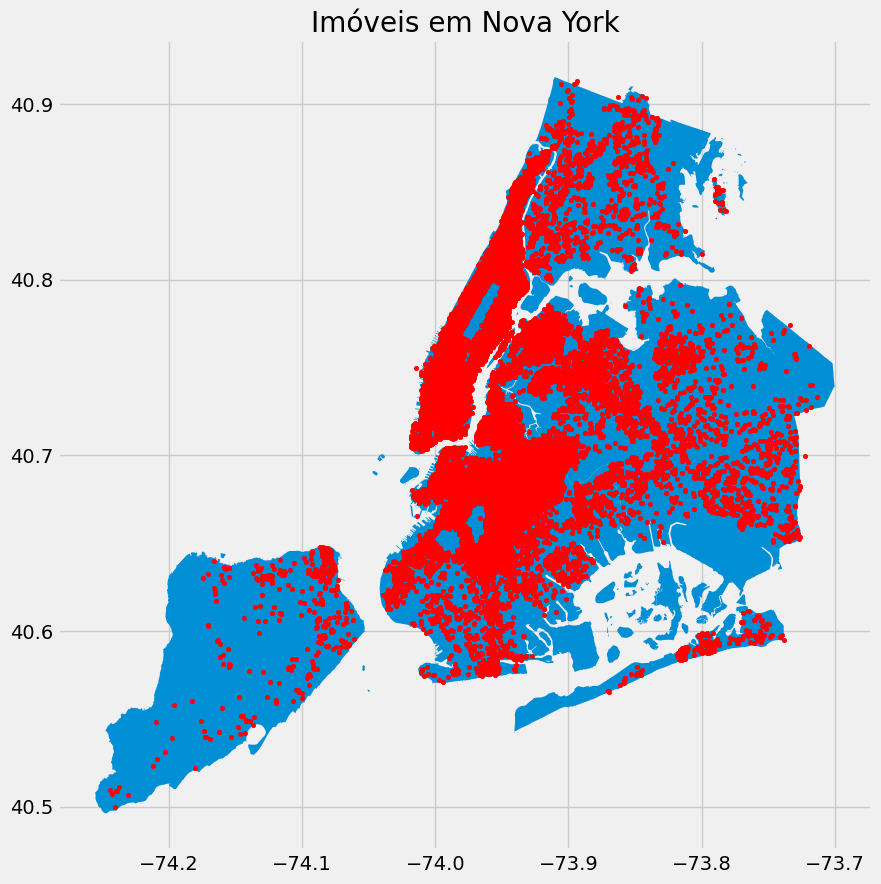

In [154]:
#Distribuição geografica dos imoveis na cidade de Nova York

longitude = base['longitude']
latitude = base['latitude']
geometry = gpd.points_from_xy(longitude, latitude)
geo_df = gpd.GeoDataFrame(base, geometry=geometry, crs="EPSG:4326")

# Carrega o mapa da cidade de Nova York (substitua pelo seu arquivo)
ny_map = gpd.read_file("dados/geo_export_87071461-9196-46f3-8d1b-52fed88fb835.shp")

# Plota os dados no mapa
ax = ny_map.plot(figsize=(10, 10))
geo_df.plot(ax=ax, color="red", markersize=10)
plt.title("Distribuição Geográfica de Imóveis em Nova York")
plt.show()

In [124]:
base.describe(include = 'object')

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,48894,48894,48894,48894,48894,48894
unique,47905,11453,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2011-03-28
freq,18,417,21661,3920,25409,10053


2.	Responda também às seguintes perguntas:

a.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [126]:
coor_bairro_review_disp = base.groupby('bairro').agg(
    disponibilidade_media=('disponibilidade_365', 'mean'),
    numero_de_reviews_medio=('numero_de_reviews', 'mean')
)

bairros_ordenados =coor_bairro_review_disp.sort_values(
    by=['disponibilidade_media', 'numero_de_reviews_medio'],
    ascending=[True, False]
)
print(bairros_ordenados)


                            disponibilidade_media  numero_de_reviews_medio
bairro                                                                    
Bay Terrace, Staten Island               0.000000                 1.500000
New Dorp                                 0.000000                 0.000000
Woodrow                                  0.000000                 0.000000
Downtown Brooklyn                       39.481928                14.313253
Morningside Heights                     43.054913                13.291908
...                                           ...                      ...
Richmondtown                           300.000000                79.000000
Eastchester                            333.461538                12.076923
Willowbrook                            351.000000                 9.000000
Co-op City                             364.000000                17.000000
Fort Wadsworth                         365.000000                 0.000000

[221 rows x 2 columns]


Com base no comparativo entre menor disponibilidade e maior média de avaliações o mais recomendado seria Bay Terrace, Staten Island

b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

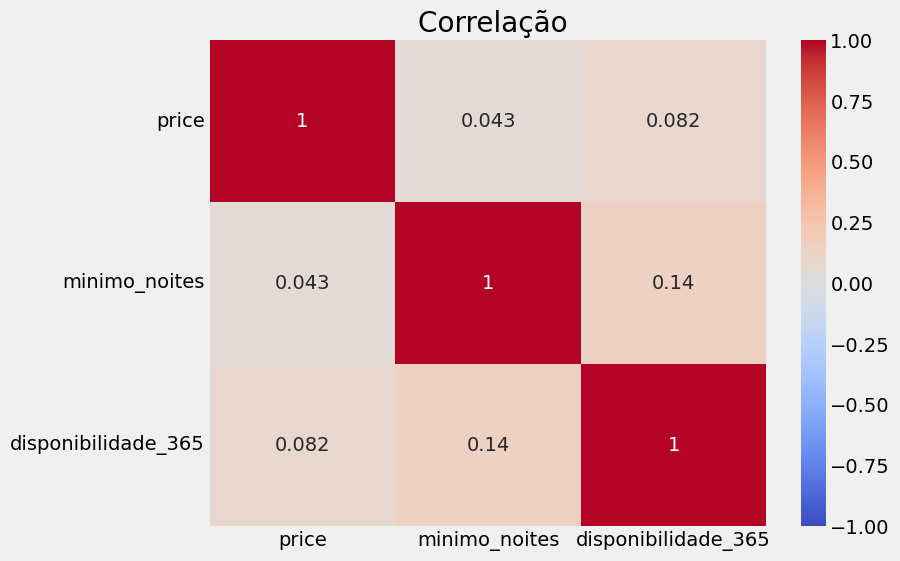

In [127]:
#analise correlção preço número minimo de noites e disponibilidade
correlacao = base[['price', 'minimo_noites', 'disponibilidade_365']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(' Correlação')
plt.show()

Resposta: os dois fatores tem uma relação positiva porém fraca, no caso da disponibilidade o impacto é um pouco maior, porém os valores indicam que outros fatores tem um impacto maior no preço.

c.	Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [128]:
#analisando os nomes dos bairros com a media de preços mais caros
base.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

In [129]:
#analisando a media de preços por bairro (nome da area)
mean_preco_x_bairro = base.groupby('bairro')['price'].mean()
mean_preco_x_bairro_sort= mean_preco_x_bairro.sort_values(ascending=False)
print(mean_preco_x_bairro_sort)

bairro
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64


In [89]:
#analisando indivualmente os bairros dos 10 imoveis mais caros
price_sorted = base.sort_values(by='price', ascending=False)

most_expensive = price_sorted['bairro'].head(10).tolist()

for bairro in most_expensive:
    print(bairro)

Greenpoint
Upper West Side
Astoria
East Harlem
Lower East Side
Lower East Side
Tribeca
Clinton Hill
Upper East Side
Battery Park City


Analisando os resultados podemos ver que alguns nomes incluem a localização como Upper West Side, East Harlem, Lower East Side o que pode indicar uma localização relevante proxima a pontos de interesse

3.	Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [171]:
for col in ['minimo_noites', 'disponibilidade_365']:
    print(f"Unique values in {col}:\n{base[col].unique()}\n")
    print(f"Data types within {col}:\n{base[col].apply(type).unique()}\n")

Unique values in minimo_noites:
[   1    3   10   45    2    5    4   90    7   14   60   29   30  180
    9   31    6   15    8   26   28  200   50   17   21   11   25   13
   35   27   18   20   40   44   65   55  120  365  122   19  240   88
  115  150  370   16   80  181  265  300   59  185  360   56   12   70
   39   24   32 1000  110  270   22   75  250   62   23 1250  364   74
  198  100  500   43   91  480   53   99  160   47  999  186  366   68
   93   87  183  299  175   98  133  354   42   33   37  225  400  105
  184  153  134  222   58  210  275  182  114   85   36]

Data types within minimo_noites:
[<class 'int'>]

Unique values in disponibilidade_365:
[355 365 194   0 129 220 188   6  39 314 333  46 321  12  21 249 347 364
 304 233  85  75 311  67 255 284 359 269 340  22  96 345 273 309  95 215
 265 192 251 302 140 234 257  30 301 294 320 154 263 180 231 297 292 191
  72 362 336 116  88 224 322 324 132 295 238 209 328  38   7 272  26 288
 317 207 185 158   9 198 219 342 

1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# iniciando a visualização dos dados
base = pd.read_csv("teste_indicium_precificacao.csv")
#exibe os 5 primeiros dados 
base.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
#exibe os 5 ultimos dados
base.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# ver o total de linhas e colunas da base 
base.shape

(48894, 16)

In [ ]:
#verificando o tipo de cada variavel
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [ ]:
#analisando as propriedades com valores nulos
base.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [ ]:
# analisando os valores da propriedade ultima_review para identificar como tratar os valores nulos
base['ultima_review'].value_counts()

ultima_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2012-09-17       1
2011-04-25       1
2012-09-03       1
2018-01-29       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [ ]:
# analisando os valores da propriedade reviews_por_mes para identificar como tratar os valores nulos
base['reviews_por_mes'].value_counts()

reviews_por_mes
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
7.85       1
7.29       1
10.37      1
9.21       1
10.54      1
Name: count, Length: 937, dtype: int64

In [ ]:
# identificando a data mais antiga da propriedade ultima_review
date = pd.to_datetime(base['ultima_review'])
earliestDate = date.min()
earliestDate_str = earliestDate.strftime('%Y-%m-%d')

# Imprimir o resultado
print(earliestDate_str)
print(type(earliestDate_str))

2011-03-28
<class 'str'>


In [ ]:
# estabelecendo os valores padrões para tratar os valores nulos das propriedades 'ultima_review','reviews_por_mes','nome' e 'host_name'
values_to_fill = {
    'ultima_review': earliestDate_str,
    'reviews_por_mes': 0,
    'nome': 'Não informado',
    'host_name': 'Não informado'
}

base = base.fillna(value=values_to_fill)

In [ ]:
# conferindo se os valores nulos foram tratados
base.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [ ]:
#informações mais detalhadas sobre a base como: média de valores, desvios padrões, valor máximo e valor minimo de cada propriedade
base.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


analisando o resultado do base.describe podemos concluir que:
A Média de preço (mean) de aproximadamente 152 dólares para aproxidamente 7 noites.

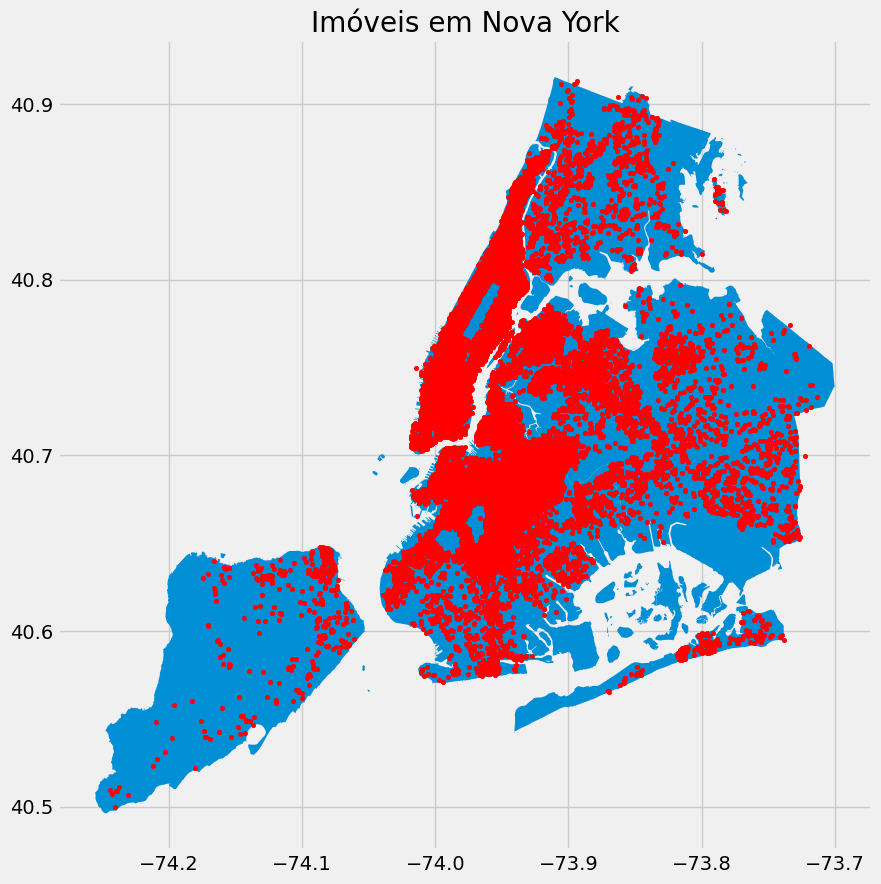

In [ ]:
#Distribuição geografica dos imoveis na cidade de Nova York

longitude = base['longitude']
latitude = base['latitude']
geometry = gpd.points_from_xy(longitude, latitude)
geo_df = gpd.GeoDataFrame(base, geometry=geometry, crs="EPSG:4326")

# Carrega o mapa da cidade de Nova York (substitua pelo seu arquivo)
ny_map = gpd.read_file("dados/geo_export_87071461-9196-46f3-8d1b-52fed88fb835.shp")

# Plota os dados no mapa
ax = ny_map.plot(figsize=(10, 10))
geo_df.plot(ax=ax, color="red", markersize=10)
plt.title("Distribuição Geográfica de Imóveis em Nova York")
plt.show()

In [ ]:
base.describe(include = 'object')

,nome,host_name,bairro_group,bairro,room_type,ultima_review
count,48894,48894,48894,48894,48894,48894
unique,47905,11453,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2011-03-28
freq,18,417,21661,3920,25409,10053


2.	Responda também às seguintes perguntas:

a.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [ ]:
coor_bairro_review_disp = base.groupby('bairro').agg(
    disponibilidade_media=('disponibilidade_365', 'mean'),
    numero_de_reviews_medio=('numero_de_reviews', 'mean')
)

bairros_ordenados =coor_bairro_review_disp.sort_values(
    by=['disponibilidade_media', 'numero_de_reviews_medio'],
    ascending=[True, False]
)
print(bairros_ordenados)


                            disponibilidade_media  numero_de_reviews_medio
bairro                                                                    
Bay Terrace, Staten Island               0.000000                 1.500000
New Dorp                                 0.000000                 0.000000
Woodrow                                  0.000000                 0.000000
Downtown Brooklyn                       39.481928                14.313253
Morningside Heights                     43.054913                13.291908
...                                           ...                      ...
Richmondtown                           300.000000                79.000000
Eastchester                            333.461538                12.076923
Willowbrook                            351.000000                 9.000000
Co-op City                             364.000000                17.000000
Fort Wadsworth                         365.000000                 0.000000

[221 rows x 2 columns]


Com base no comparativo entre menor disponibilidade e maior média de avaliações o mais recomendado seria Bay Terrace, Staten Island

b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

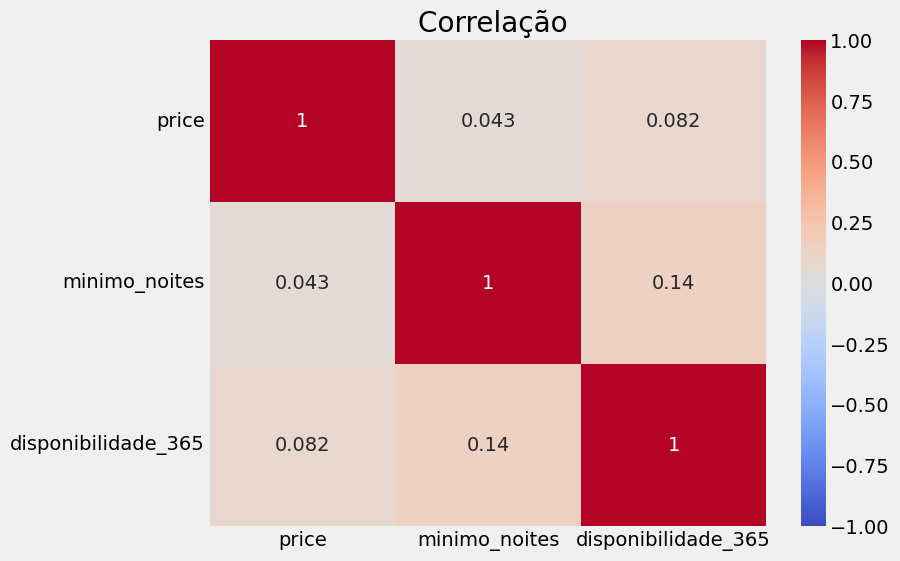

In [ ]:
#analise correlção preço número minimo de noites e disponibilidade
correlacao = base[['price', 'minimo_noites', 'disponibilidade_365']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(' Correlação')
plt.show()

Resposta: os dois fatores tem uma relação positiva porém fraca, no caso da disponibilidade o impacto é um pouco maior, porém os valores indicam que outros fatores tem um impacto maior no preço.

c.	Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [ ]:
#analisando os nomes dos bairros com a media de preços mais caros
base.groupby('bairro_group')['price'].mean().sort_values(ascending=False)

bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

In [ ]:
#analisando a media de preços por bairro (nome da area)
mean_preco_x_bairro = base.groupby('bairro')['price'].mean()
mean_preco_x_bairro_sort= mean_preco_x_bairro.sort_values(ascending=False)
print(mean_preco_x_bairro_sort)

bairro
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64


In [ ]:
#analisando indivualmente os bairros dos 10 imoveis mais caros
price_sorted = base.sort_values(by='price', ascending=False)

most_expensive = price_sorted['bairro'].head(10).tolist()

for bairro in most_expensive:
    print(bairro)

Greenpoint
Upper West Side
Astoria
East Harlem
Lower East Side
Lower East Side
Tribeca
Clinton Hill
Upper East Side
Battery Park City


In [175]:
#analisando os nomes no anuncio dos 10 imoveis mais caros
price_sorted = base.sort_values(by='price', ascending=False)

most_expensive = price_sorted['nome'].head(10).tolist()

for bairro in most_expensive:
    print(bairro)

Luxury 1 bedroom apt. -stunning Manhattan views
1-BR Lincoln Center
Furnished room in Astoria apartment
Spanish Harlem Apt
2br - The Heart of NYC: Manhattans Lower East Side
Quiet, Clean, Lit @ LES & Chinatown
Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho
Film Location
East 72nd Townhouse by (Hidden by Airbnb)
70' Luxury MotorYacht on the Hudson


Analisando os resultados podemos ver que alguns nomes incluem palavras como 'luxury' que remetem a luxo e sofisticação e outras incluem a localização o que pode indicar uma localização relevante proxima a pontos de interesse

3.	Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [181]:
	
base.select_dtypes('object').columns

Index(['nome', 'host_name', 'bairro_group', 'bairro', 'room_type',
       'ultima_review'],
      dtype='object')

In [ ]:
# removendo algumas propriedades que não são relevantes para o modelo
base = base.drop(['nome'], axis = 1)
base = base.drop(['host_name'], axis = 1)
base = base.drop(['ultima_review'], axis = 1)

In [3]:
#hot encoder para preparar as propriedades para o modelo
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(base[['bairro_group', 'bairro', 'room_type']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
scaler = StandardScaler()
numerical_features = scaler.fit_transform(base[['minimo_noites','numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']])
scaled_df = pd.DataFrame(numerical_features, columns=['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365'])
base_transformada = pd.concat([base.drop(['bairro_group', 'bairro', 'room_type','minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365'], axis=1), encoded_df, scaled_df], axis=1)

# Separar features (X) e target (y)
X = base_transformada.drop('price', axis=1)
y = base_transformada['price']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'OneHotEncoder' is not defined

In [204]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (39115, 237)
Shape of y_train: (39115,)
Shape of x_test: (9779, 237)
Shape of y_test: (9779,)


In [2]:
#Treinamento do modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [206]:
# predições nos dados de teste
y_pred = model.predict(x_test)
print("Trainning Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Trainning Accuracy:  1.0
Testing Accuracy:  0.09029553124041313


In [ ]:
import dill  

dill.dump(model, open('price_imoveis_prediction.pkl', 'wb'))

4.	Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?


In [87]:
# selecionando os imoveis no bairro Midton do tipo Entire home/apt 
manhattan_midtown_imoveis = base[
    (base['bairro_group'] == 'Manhattan') &
    (base['bairro'] == 'Midtown') &
    (base['room_type'] == 'Entire home/apt')
]

# Calcula a média
media_precos = manhattan_midtown_imoveis['price'].mean()
print(media_precos)

301.2681818181818


Com base nisso minha recomendação de preço seria 301.27 arrendondando a média dos preços de imoveis da região